In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique
import seaborn as sns

#ML imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('bank-dataset.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

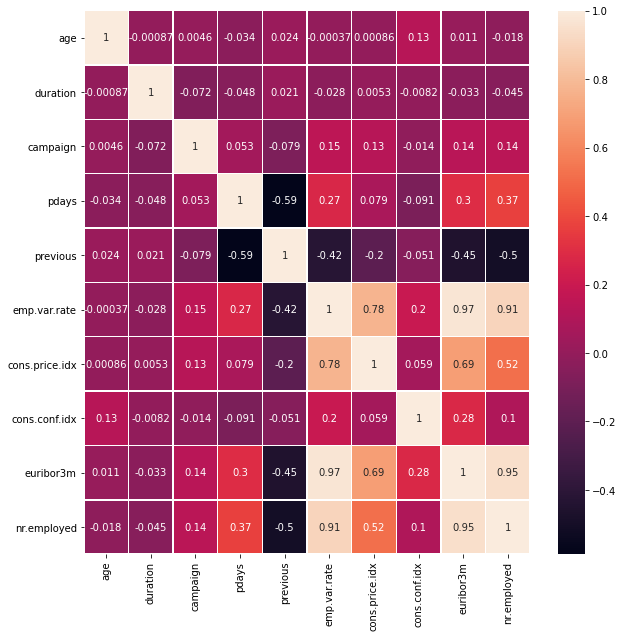

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True, linewidths=.5)

#### Will the age influence to take Term deposit or not ?

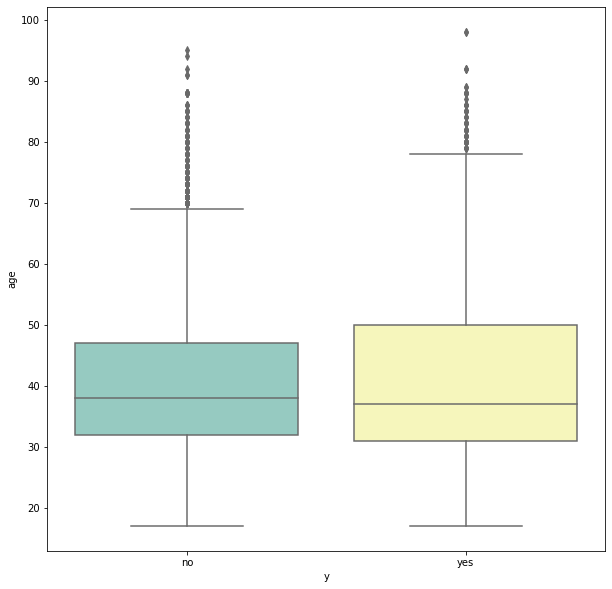

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x="y",y="age",data=df,palette="Set3")

- There is overlap between Yes and No of the Age. But if we look at the higher age people considering the maximum whisker of the yes box plot we can say that few of the people with age above 77 tend to apply for TD

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#### Distribution of TD subscribers based on education

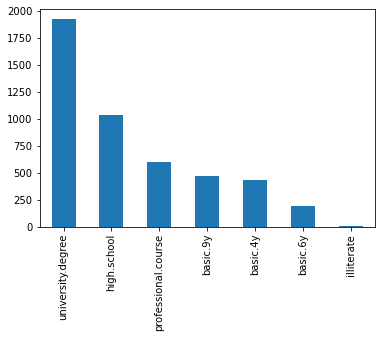

In [9]:
df[df['y'] == 'yes']['education'].value_counts().plot(kind='bar')

- University degree holders tend to take TD more than other education background.
- We could promote about the TD scheme to university students
- Education would be a good predictor.

#### What kind of job influence to take TD?

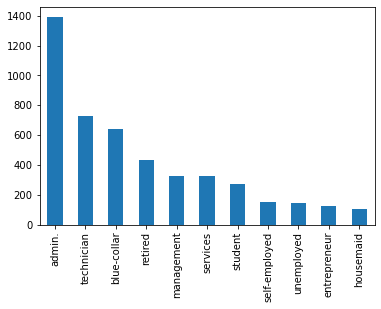

In [10]:
df[df['y'] == 'yes']['job'].value_counts().plot(kind='bar')

- People with admin kind of job tend to apply for TD.
- The graph shows clear majority for admin followed by technician

#### Will the credit in default effect applying TD?

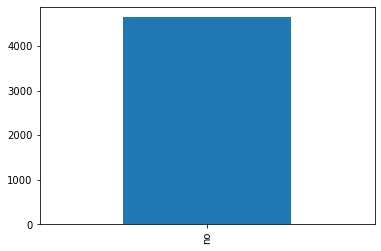

In [11]:
df[df['y'] == 'yes']['default'].value_counts().plot(kind='bar')

- Its intresting to see that people with no credit in default subscribe to TD. 

#### Will the people having house loans subscribe to TD?

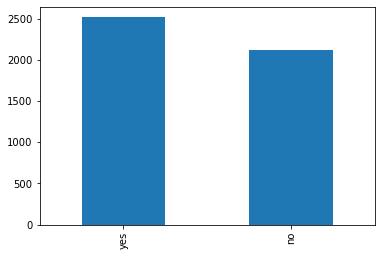

In [12]:
df[df['y'] == 'yes']['housing'].value_counts().plot(kind='bar')

- People with house loans tend to subscribe more to TD compare to people with no housing loan

#### Will the people having personal loans subscribe to TD?

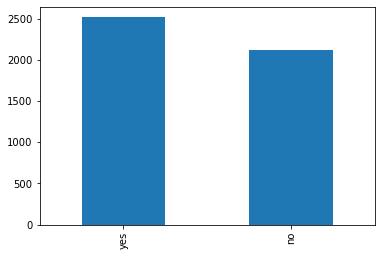

In [13]:
df[df['y'] == 'yes']['housing'].value_counts().plot(kind='bar')

- People with personal loans tend to subscribe more to TD compare to people with no housing loan

#### Will the marital status influence in subscribing tpTD

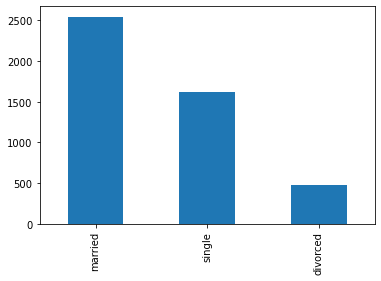

In [14]:
df[df['y'] == 'yes']['marital'].value_counts().plot(kind='bar')

- Married people subscribe more and divorse subscribe least. Married people might earn more money to subscribe for TD. Special attention to be given to them

#### Which last contact month had many TD subscribers?

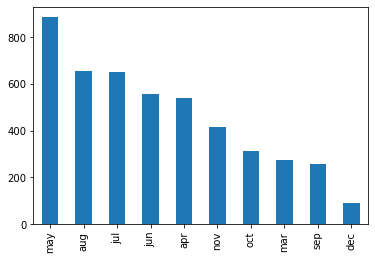

In [15]:
df[df['y'] == 'yes']['month'].value_counts().plot(kind='bar')

- The last contact month 'May' has the highest TD subscribers

#### Let's visualize the difference between TD subscribers and non-subscribers for each of the feature

Text(0.5, 1.0, 'job')

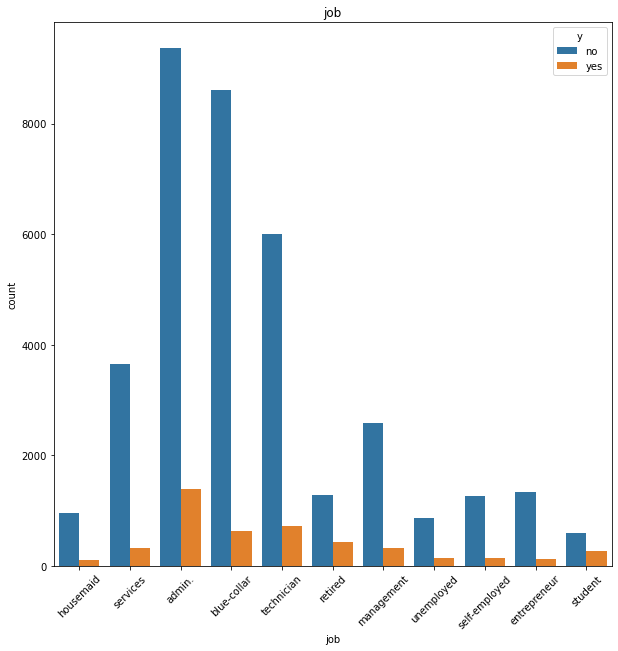

In [16]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['job'],hue=df['y'],data=df)
plt.xticks(rotation = 45)
plt.title('job')

- The ratio of [not-subscribed/subscribed] is more than 4 times for admin,services,blue-collar,tecnician and management job-types. If we look at the [not-subscribed/subscribed] ratio for student it is considerably less. 1/3rd of them did subscribe to TD. 

Text(0.5, 1.0, 'marital')

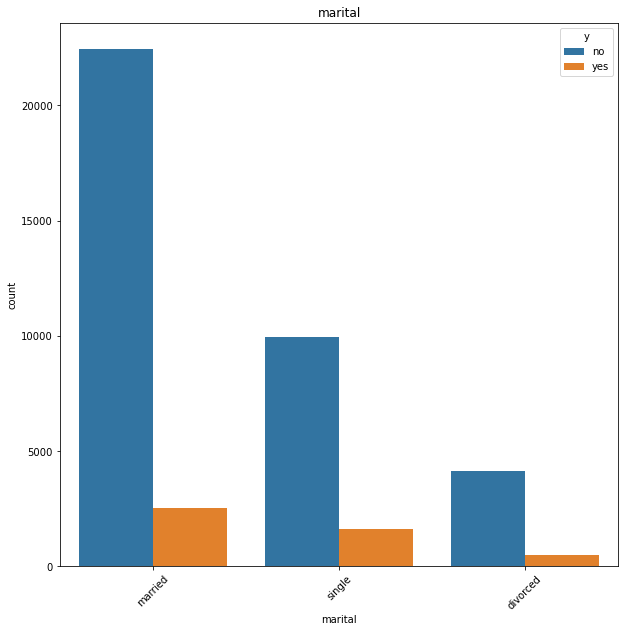

In [17]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['marital'],hue=df['y'],data=df)
plt.xticks(rotation = 45)
plt.title('marital')

- Eventhough married people subscribe more to TD there is lot of disproportion between non-subscribed and subscribed. The same follows with the rest of marital status.

#### Contact communication type VS TD

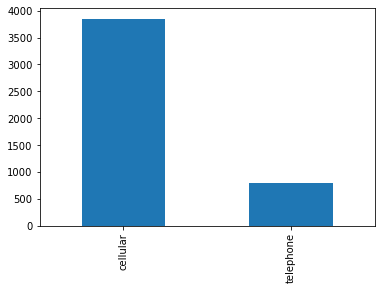

In [18]:
df[df['y'] == 'yes']['contact'].value_counts().plot(kind='bar')

- Cellular mode of contact should be preferred more as it influences to subscribe to TD. This is a good key point to consider.

Text(0.5, 1.0, 'contact')

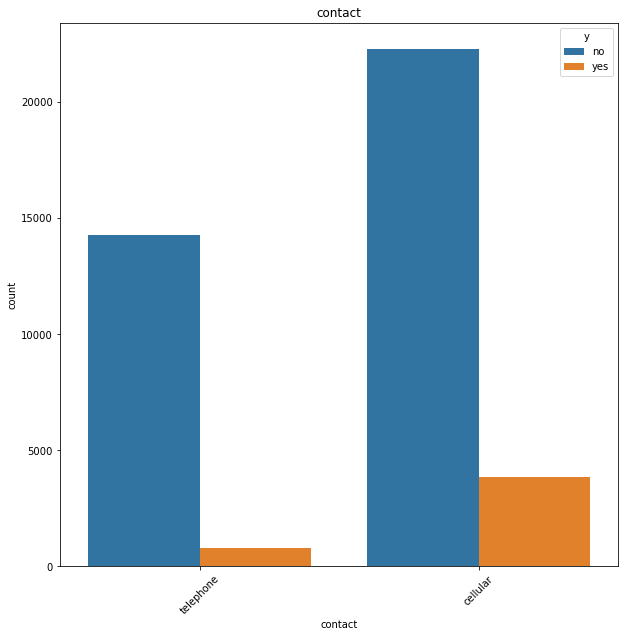

In [19]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['contact'],hue=df['y'],data=df)
plt.xticks(rotation = 45)
plt.title('contact')

- There is lot disproportion among the contact type vs TD subscribe.

#### Does day of the week impact subscribing to TD?

Text(0.5, 1.0, 'day_of_week')

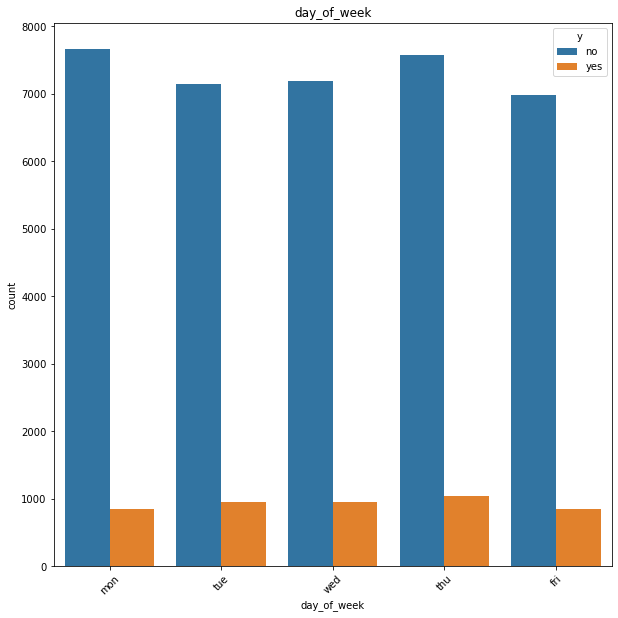

In [20]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['day_of_week'],hue=df['y'],data=df)
plt.xticks(rotation = 45)
plt.title('day_of_week')

- There is impact from day_of_week feature as the number of subscribers are almost constant all the days. Can remove this feature

#### Will number of contacts performed before this campaign impact TD subscription

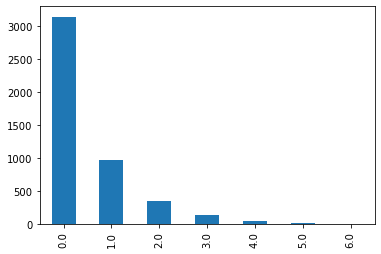

In [21]:
df[df['y'] == 'yes']['previous'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'previous')

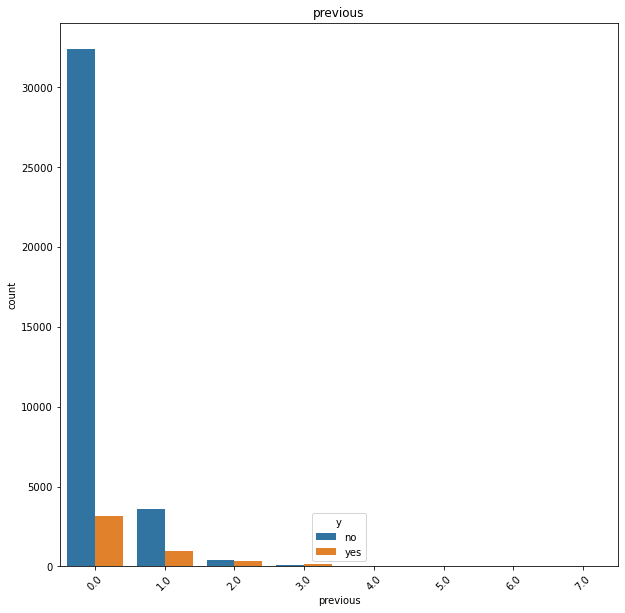

In [22]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['previous'],hue=df['y'],data=df)
plt.xticks(rotation = 45)
plt.title('previous')

- Most of the TD subscriptions happened without any previous contacts. But few of the people subscribed after calling 1-3 times. So this feature adds some amount of value.

#### Does the increase in number of employees in the bank can convert customers to TD subscribers ?

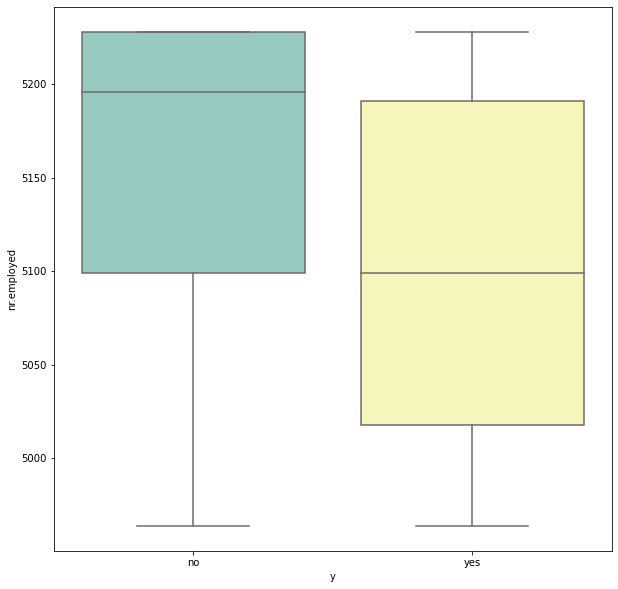

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x="y",y="nr.employed",data=df,palette="Set3")

- By analysing the boxplot of yes we can see that IQR(Q3-Q1) and median is around 5100. For the no box-plot it is higher. 
- The yes box plot is not skewed unlike the no box-plot.
- The No box plot is negatively skewed.

# Modeling and Fitting 

In [25]:
int_column = df.dtypes[df.dtypes =='int64'].index |  df.dtypes[df.dtypes =='float64'].index
int_column.nunique()

10

In [26]:
int_column

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [28]:
obj_col=df.dtypes[df.dtypes=='object'].index
obj_col.nunique()

11

In [29]:
for i in range(len(obj_col)):
    print(obj_col[i])
    print(df[obj_col[i]].unique())
    print()

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']

marital
['married' 'single' 'divorced']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']

default
['no' 'yes']

housing
['no' 'yes']

loan
['no' 'yes']

contact
['telephone' 'cellular']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

poutcome
['nonexistent' 'failure' 'success']

y
['no' 'yes']



In [32]:
labelencoder_X = LabelEncoder() 
df['job']=labelencoder_X.fit_transform(df['job'])
df['marital']=labelencoder_X.fit_transform(df['marital'])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day_of_week"] = labelencoder_X.fit_transform(df["day_of_week"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])
df["y"] = labelencoder_X.fit_transform(df["y"])


In [33]:
pd.set_option("max_columns",None)
print(df.shape)

(41188, 21)


In [34]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,0,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,1,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


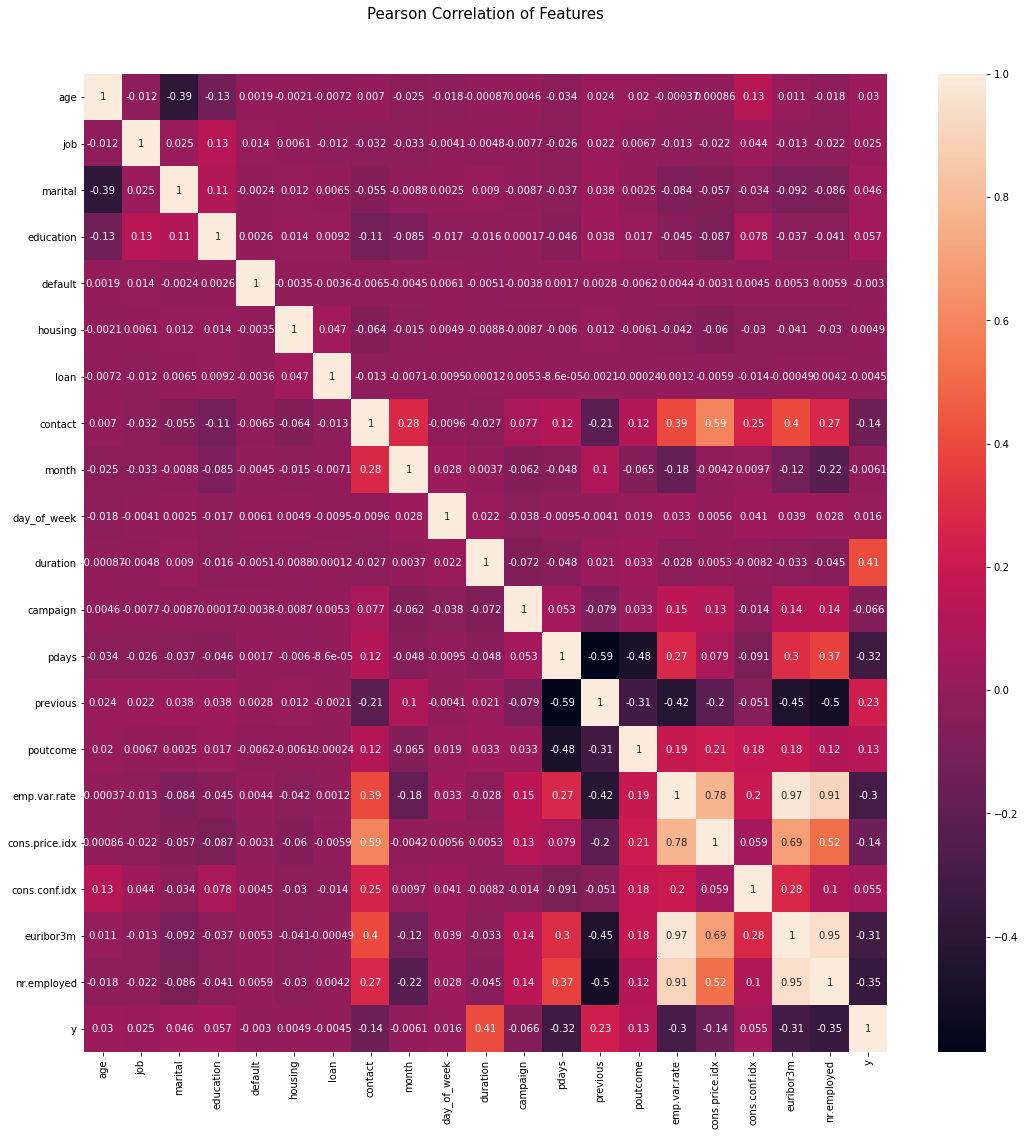

In [35]:
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation of Features', y = 1.05, size=15)
sns.heatmap(df.astype(float).corr(),annot=True);

In [41]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('y',axis=1),df['y'],test_size=0.3)

In [42]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

28831
12357
28831
12357


In [43]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
31990,38.0,9,1,6,0,1,0,0,6,2,174.0,3.0,999.0,1.0,0,-1.8,92.893,-46.2,1.327,5099.1
17555,41.0,0,1,3,0,1,1,0,3,1,234.0,15.0,999.0,0.0,1,1.4,93.918,-42.7,4.962,5228.1
37914,34.0,9,1,5,0,1,1,0,9,4,121.0,3.0,999.0,0.0,1,-3.4,92.379,-29.8,0.813,5017.5
39300,33.0,6,1,6,0,1,0,0,5,4,184.0,1.0,11.0,1.0,2,-1.8,93.369,-34.8,0.644,5008.7
16564,25.0,1,2,2,0,1,0,0,3,4,439.0,1.0,999.0,0.0,1,1.4,93.918,-42.7,4.963,5228.1


In [44]:
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)
X_train = pd.DataFrame(X_train, columns=df.drop('y',axis=1).columns)
X_test = pd.DataFrame(X_test, columns=df.drop('y',axis=1).columns)

In [45]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.259259,0.9,0.5,1.000000,0.0,1.0,0.0,0.0,0.666667,0.50,0.035380,0.036364,1.000000,0.142857,0.0,0.333333,0.269680,0.192469,0.157107,0.512287
1,0.296296,0.0,0.5,0.500000,0.0,1.0,1.0,0.0,0.333333,0.25,0.047580,0.254545,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
2,0.209877,0.9,0.5,0.833333,0.0,1.0,1.0,0.0,1.000000,1.00,0.024603,0.036364,1.000000,0.000000,0.5,0.000000,0.069369,0.878661,0.040580,0.203781
3,0.197531,0.6,0.5,1.000000,0.0,1.0,0.0,0.0,0.555556,1.00,0.037414,0.000000,0.011011,0.142857,1.0,0.333333,0.455183,0.669456,0.002267,0.170510
4,0.098765,0.1,1.0,0.333333,0.0,1.0,0.0,0.0,0.333333,1.00,0.089264,0.000000,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981410,1.000000


In [46]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          ]

names = [ 'LogisticRegression',
         'DecisionTreeClassifier',
          'RandomForestClassifier',
          ]

for model,name in zip(models,names):
    m = model.fit(X_train,y_train)
    print(name, 'report:')
    print('Train score',model.score(X_train,y_train))
    print('Test score',model.score(X_test,y_test))
    print()
    print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
    print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
    print('*'*50)

LogisticRegression report:
Train score 0.9102008255003295
Test score 0.9075827466213482

Train confusion matrix:
 [[25047   580]
 [ 2009  1195]] 

Test confusion matrix:
 [[10695   226]
 [  916   520]]
**************************************************
DecisionTreeClassifier report:
Train score 1.0
Test score 0.8892935178441369

Train confusion matrix:
 [[25627     0]
 [    0  3204]] 

Test confusion matrix:
 [[10249   672]
 [  696   740]]
**************************************************
RandomForestClassifier report:
Train score 0.9999306302244112
Test score 0.9120336651290767

Train confusion matrix:
 [[25627     0]
 [    2  3202]] 

Test confusion matrix:
 [[10577   344]
 [  743   693]]
**************************************************


In [47]:
pred_y = m.predict(X_test)
print('*'*50)
print('Report')
print('model : RandomForestClassifier')
print('Train score',model.score(X_train,y_train))
print('Test score',model.score(X_test,y_test))
print()
print("accuracy: %.2f" %accuracy_score(y_test, pred_y))
print("Precision : %.3f" % precision_score(y_test, pred_y))
print("Recall : %.3f" % recall_score(y_test, pred_y))
print("F1 : %.3f" % f1_score(y_test, pred_y))
print()
print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
print('*'*50)

**************************************************
Report
model : RandomForestClassifier
Train score 0.9999306302244112
Test score 0.9120336651290767

accuracy: 0.91
Precision : 0.668
Recall : 0.483
F1 : 0.560

Train confusion matrix:
 [[25627     0]
 [    2  3202]] 

Test confusion matrix:
 [[10577   344]
 [  743   693]]
**************************************************


## Inference

- Duration is the most important feature which should be discarded because it is not known before a call is performed. Still, it indicates that making a call longer could help a lot to increase the subscription.

- The higher cons.price.idx and euribor3m, the lower emp.var.rate and nr.employed, which are all social and economic context attributes, the more likely to subscribe the term deposit. The social and economic context attributes were the most helpful features to predict.

- Among Bank Clients Data, default was a significant factor but not that much as Social Economic was. Other Bank Clients such as Job, Martial, Education were not an influential factor.

- When it comes to attributes which are related with the last contact of the current campaign, coefficient of Contact and Month were higher than any other Bank Clients Data attributes.

- In conclusion, subscription mostly depends on social and economic situation. Thus, to make more cost efficient to increase subcribition to a term deposit, it is needed to concentrate marketing budget on certain time when euribor rate, comsumer price rate are high, employment variation rate is low.